Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=520.182, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=486.284, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=496.773, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=487.965, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=474.778, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=475.394, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=474.635, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=476.623, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=476.597, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=473.332, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=473.137, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=473.950, Time=0.1

<Axes: xlabel='Date'>

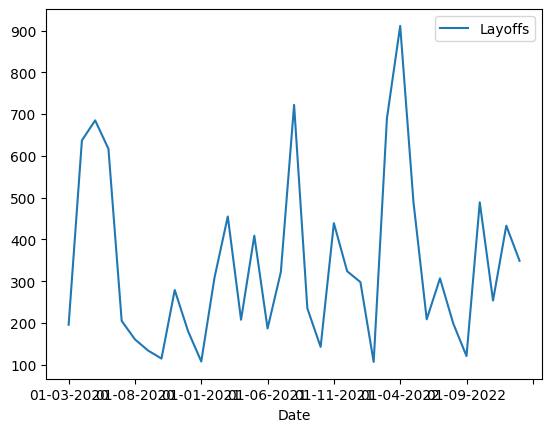

In [2]:
import pandas as pd
from pmdarima.arima import auto_arima

# Load your dataset
df = pd.read_csv('webDev6.csv', index_col='Date')

# Fit an Auto-ARIMA model
model = auto_arima(df, seasonal=False, trace=True)

# Print the summary of the model
print(model.summary())
df.plot()



In [8]:
# Generate predictions for next 12 months
future_forecast = model.predict(n_periods=12)

# Print the predicted values
print(future_forecast)
# import matplotlib.pyplot as plt
# plt.plot(future_forecast)

35    362.914286
36    362.914286
37    362.914286
38    362.914286
39    362.914286
40    362.914286
41    362.914286
42    362.914286
43    362.914286
44    362.914286
45    362.914286
46    362.914286
dtype: float64


c:\Users\white\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [9]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Preprocess the data
df = pd.read_csv('webdev5.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['Layoffs'] = pd.to_numeric(df['Layoffs'], errors='coerce')

df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df = df.set_index(['Date'])

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit an ARIMA model
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

# Make predictions on the testing data
predictions = model_fit.predict(start=test.index[0], end=test.index[-1])

# Evaluate the performance of the model
mse = mean_squared_error(test[''], predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['Layoffs'], predictions)

# Make predictions on future dates
future_predictions = model_fit.forecast(steps=12)

# Visualize the predicted values
plt.plot(df.index, df['Layoffs'], label='Actual')
plt.plot(test.index, predictions, label='Predicted')
plt.plot(future_predictions.index, future_predictions, label='Future Predictions')
plt.legend()
plt.show()




KeyError: 'Date'